<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load data
movies = '/content/drive/My Drive/ProjectBigData/ml-1m/movies.dat'
ratings = '/content/drive/My Drive/ProjectBigData/ml-1m/ratings.dat'
users = '/content/drive/My Drive/ProjectBigData/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python' , encoding='latin-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', encoding='latin-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

In [ ]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


### merge data

In [71]:
# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


## Data Preparation

### Explore variables and check data quality

In [ ]:
# ขนาดของข้อมูล (จำนวนแถวและคอลัมน์)
merged_df.shape

(1000209, 10)

In [ ]:
# ชนิดข้อมูลในแต่ละคอลัมน์
print(merged_df.dtypes)

UserID         int64
MovieID        int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
Title         object
Genres        object
dtype: object


In [ ]:
# ข้อมูลสรุปทั่วไป เช่น ค่าว่าง ประเภท dtype เป็นต้น
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   Timestamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 76.3+ MB


In [ ]:
# สำหรับตัวแปรเชิงตัวเลข
merged_df.describe()

# สำหรับตัวแปรเชิงหมวดหมู่
merged_df.describe(include='object')


,Gender,Zip-code,Title,Genres
count,1000209,1000209,1000209,1000209
unique,2,3439,3706,301
top,M,94110,American Beauty (1999),Comedy
freq,753769,3802,3428,116883


In [ ]:
# จำนวนแถวที่ซ้ำกัน
merged_df.duplicated().sum()

# แสดงแถวที่ซ้ำ
merged_df[merged_df.duplicated()]

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres


### Handle missing values, outliers, and noises

In [ ]:
merged_df.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Genres,0


### Perform feature engineering (optional)

In [72]:
import re

# ดึงปีออกมา
merged_df['Year'] = merged_df['Title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1))
                                            if re.search(r'\((\d{4})\)', x) else None)

In [73]:
merged_df['Gender'] = merged_df['Gender'].map({'M': 1, 'F': 0})

In [74]:
# แยกคอลัมน์ Genres ด้วยตัวคั่น '|'
# โดยจำกัดจำนวนคอลัมน์สูงสุดเป็น 3 (สามารถเพิ่มหรือลดตามความเหมาะสม)
split_genres = merged_df['Genres'].str.split('|', expand=True)

# ตั้งชื่อคอลัมน์ใหม่ Genre1, Genre2, Genre3 โดยใช้ iloc เพื่อเลือกคอลัมน์ที่ต้องการ
merged_df['Genre1'] = split_genres.iloc[:, 0]
merged_df['Genre2'] = split_genres.iloc[:, 1]
merged_df['Genre3'] = split_genres.iloc[:, 2]

# ลบคอลัมน์ Genres ออก
merged_df = merged_df.drop(columns=['Genres'])

In [75]:
# Date Time
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')
merged_df['Month_Rated'] = merged_df['Datetime'].dt.month
merged_df['Hour_Rated'] = merged_df['Datetime'].dt.time


In [76]:
# ฟังก์ชันเพื่อแปลง Genre เป็นตัวเลข
def genre_to_number(genre):
    # ถ้า genre เป็น None หรือค่าว่าง ให้คืนค่า 0
    if genre is None or genre == '':
        return 0

    # Check if genre is of type int or float before proceeding
    if isinstance(genre, (int, float)):
        return genre  # Return the value as is if it's already numeric

    genre_dict = {
        "Action": 1,
        "Adventure": 2,
        "Animation": 3,
        "Children's": 4,
        "Comedy": 5,
        "Crime": 6,
        "Documentary": 7,
        "Drama": 8,
        "Fantasy": 9,
        "Film-Noir": 10,
        "Horror": 11,
        "Musical": 12,
        "Mystery": 13,
        "Romance": 14,
        "Sci-Fi": 15,
        "Thriller": 16,
        "War": 17,
        "Western": 18,
    }

    # Strip any leading/trailing whitespace and return corresponding value or 0 if not found
    return genre_dict.get(genre.strip(), 0)  # Return 0 for unknown genres

# ใช้ apply เพื่อแปลง Genre1, Genre2, Genre3
merged_df['Genre1'] = merged_df['Genre1'].apply(genre_to_number)
merged_df['Genre2'] = merged_df['Genre2'].apply(genre_to_number)
merged_df['Genre3'] = merged_df['Genre3'].apply(genre_to_number)

In [77]:
merged_df.drop(columns=['Timestamp', 'Zip-code'], inplace=True)

In [78]:
# 0 = dont'like 1 = like
merged_df['Liked'] = (merged_df['Rating'] >= 4).astype(int)

# สร้าง AgeGroup (optional สำหรับวิเคราะห์กลุ่มอายุ)
def age_group(age):
    if age <= 18:
        return "Teen"
    elif age <= 35:
        return "Young Adult"
    elif age <= 50:
        return "Adult"
    else:
        return "Senior"
merged_df['AgeGroup'] = merged_df['Age'].apply(age_group)

In [79]:
merged_df.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Title,Year,Genre1,Genre2,Genre3,Datetime,Month_Rated,Hour_Rated,Liked,AgeGroup
0,1,1193,5,0,1,10,One Flew Over the Cuckoo's Nest (1975),1975,8,0,0,2000-12-31 22:12:40,12,22:12:40,1,Teen
1,1,661,3,0,1,10,James and the Giant Peach (1996),1996,3,4,12,2000-12-31 22:35:09,12,22:35:09,0,Teen
2,1,914,3,0,1,10,My Fair Lady (1964),1964,12,14,0,2000-12-31 22:32:48,12,22:32:48,0,Teen
3,1,3408,4,0,1,10,Erin Brockovich (2000),2000,8,0,0,2000-12-31 22:04:35,12,22:04:35,1,Teen
4,1,2355,5,0,1,10,"Bug's Life, A (1998)",1998,3,4,5,2001-01-06 23:38:11,1,23:38:11,1,Teen


## Explore Data

#### Descriptive statistics

In [28]:
num_users = merged_df['UserID'].nunique()
num_movies = merged_df['MovieID'].nunique()
num_ratings = len(merged_df)

print(f"จำนวนผู้ใช้ทั้งหมด: {num_users}")
print(f"จำนวนภาพยนตร์ทั้งหมด: {num_movies}")
print(f"จำนวนการให้คะแนนทั้งหมด: {num_ratings}")


จำนวนผู้ใช้ทั้งหมด: 6040
จำนวนภาพยนตร์ทั้งหมด: 3706
จำนวนการให้คะแนนทั้งหมด: 1000209


In [29]:
rating_mean = merged_df['Rating'].mean()
rating_median = merged_df['Rating'].median()
rating_std = merged_df['Rating'].std()
rating_min = merged_df['Rating'].min()
rating_max = merged_df['Rating'].max()
rating_quartiles = merged_df['Rating'].quantile([0.25, 0.5, 0.75])

print(f"ค่าเฉลี่ยของ Rating: {rating_mean:.2f}")
print(f"มัธยฐานของ Rating: {rating_median}")
print(f"การกระจาย (Std) ของ Rating: {rating_std:.2f}")
print(f"Min Rating: {rating_min}, Max Rating: {rating_max}")
print("Quartiles ของ Rating:")
print(rating_quartiles)

ค่าเฉลี่ยของ Rating: 3.58
มัธยฐานของ Rating: 4.0
การกระจาย (Std) ของ Rating: 1.12
Min Rating: 1, Max Rating: 5
Quartiles ของ Rating:
0.25    3.0
0.50    4.0
0.75    4.0
Name: Rating, dtype: float64


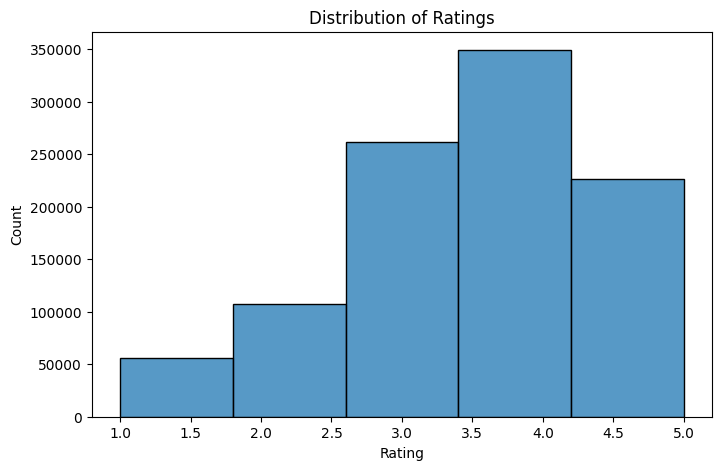

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [31]:
merged_df.groupby('Gender')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,246440.0,3.620366,1.111228,1.0,3.0,4.0,4.0,5.0
1,753769.0,3.568879,1.118724,1.0,3.0,4.0,4.0,5.0


In [32]:
merged_df.groupby('UserID')['Rating'].mean().describe()

,Rating
count,6040.000000
mean,3.702705
std,0.429622
min,1.015385
25%,3.444444
50%,3.735294
75%,4.000000
max,4.962963


In [33]:
merged_df.groupby('Title')['Rating'].mean()

,Rating
Title,
"$1,000,000 Duck",3.027027
'Night Mother,3.371429
'Til There Was You,2.692308
"'burbs, The",2.910891
...And Justice for All,3.713568
...,...
"Zed & Two Noughts, A",3.413793
Zero Effect,3.750831
Zero Kelvin (Kjærlighetens kjøtere),3.500000


In [34]:
merged_df.groupby('Gender')['Rating'].mean()

,Rating
Gender,
0,3.620366
1,3.568879


In [35]:
merged_df.groupby('Age')['Rating'].mean()

,Rating
Age,
1,3.549520
18,3.507573
25,3.545235
35,3.618162
45,3.638062
50,3.714512
56,3.766632


In [36]:
merged_df.groupby('Occupation')['Rating'].mean()

,Rating
Occupation,
0,3.537544
1,3.576642
2,3.573081
3,3.656516
4,3.536793
5,3.537529
6,3.661578
7,3.599772
8,3.466741


In [37]:
# เลือกเฉพาะคอลัมน์ที่เกี่ยวข้อง
Genre_cols = ['Genre1', 'Genre2', 'Genre3']

# melt ให้เป็น long format
Genre_all = merged_df.melt(id_vars=['Rating'], value_vars=Genre_cols,
                         value_name='Genre').drop('variable', axis=1)

# ลบค่า 0 หรือ missing (ถ้าใช้ 0 แทน genre ว่าง)
Genre_all = Genre_all[Genre_all['Genre'] != 0]

Genre_all.groupby('Genre')['Rating'].mean()

,Rating
Genre,
1,3.491185
2,3.477257
3,3.684868
4,3.423381
5,3.525623
6,3.727783
7,3.933123
8,3.769635
9,3.470852


In [38]:
# 1. คำนวณค่าเฉลี่ยต่อปี
year_mean_rating = merged_df.groupby('Year')['Rating'].mean()
# 2. เรียงจากมากไปน้อย
year_mean_rating_sorted = year_mean_rating.sort_values(ascending=False)

year_mean_rating_sorted

,Rating
Year,
1927,4.277778
1941,4.179837
1946,4.162653
1952,4.126487
1957,4.108890
...,...
1997,3.411654
1996,3.388502
2000,3.373341


#### Data visualization

#####  เพศชายมีแนวโน้มให้คะแนนสูงกว่าในแนว Action / Sci-Fi / Thriller เพศหญิงให้คะแนนสูงกว่าในแนว Romance / Drama / Comedy



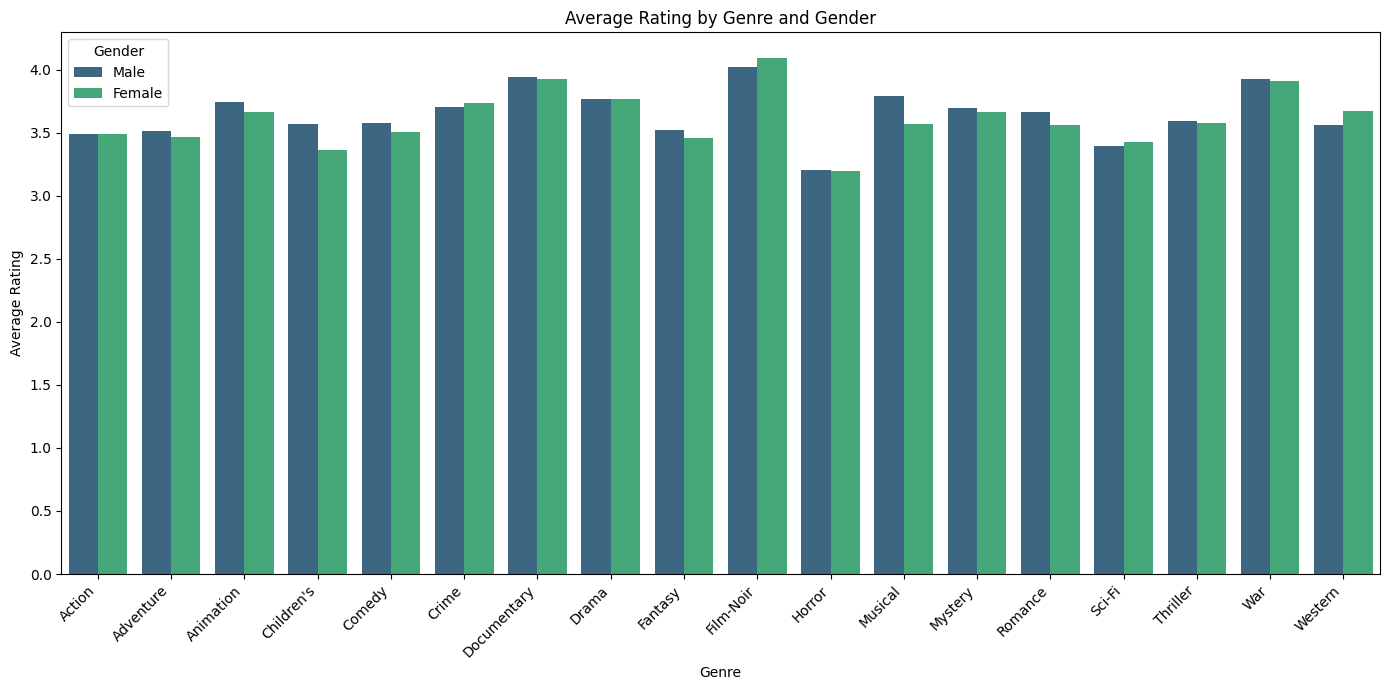

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Gender', 'Rating'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Group by Gender and GenreName and calculate the mean rating
genre_rating_mean = genres_melted.groupby(['Gender', 'GenreName'])['Rating'].mean().reset_index()

# Map Gender back to string labels for plotting
genre_rating_mean['Gender'] = genre_rating_mean['Gender'].map({0: 'Male', 1: 'Female'})

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='GenreName', y='Rating', hue='Gender', data=genre_rating_mean, palette='viridis')
plt.title('Average Rating by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### เพศหญิงจะมีพฤติกรรมการดูหนังแนว Comedy drama มากกว่าเพศชาย

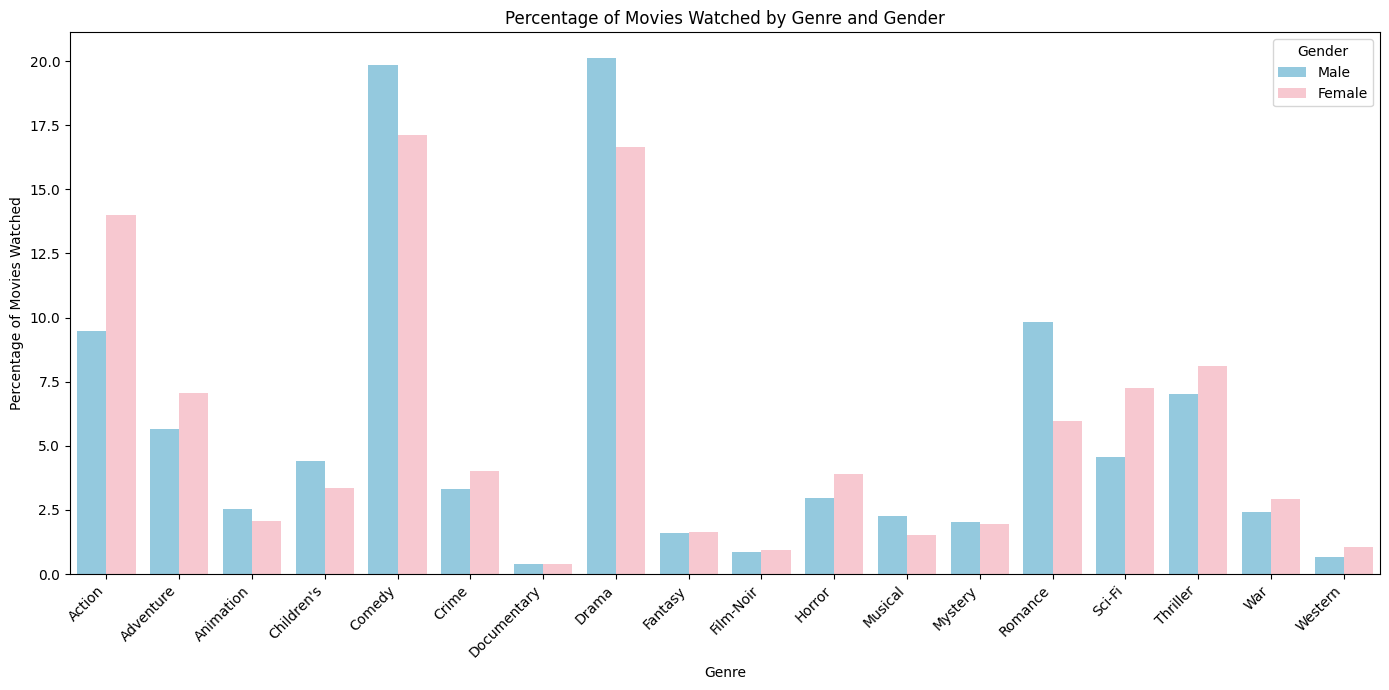

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Gender'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Group by Gender and GenreName and count the number of movies
genre_counts = genres_melted.groupby(['Gender', 'GenreName']).size().reset_index(name='MovieCount')

# Calculate the total movie count for each gender
total_movie_count_by_gender = genre_counts.groupby('Gender')['MovieCount'].sum().reset_index(name='TotalMovieCount')

# Merge to get the total count for percentage calculation
genre_counts = pd.merge(genre_counts, total_movie_count_by_gender, on='Gender')

# Calculate the percentage
genre_counts['Percentage'] = (genre_counts['MovieCount'] / genre_counts['TotalMovieCount']) * 100

# Map Gender back to string labels for plotting
genre_counts['Gender'] = genre_counts['Gender'].map({0: 'Male', 1: 'Female'})

# Define a custom palette with specific colors for Male and Female
custom_palette = {'Male': 'skyblue', 'Female': 'pink'}

# Create the bar plot comparing movie percentages by genre and gender
plt.figure(figsize=(14, 7))
sns.barplot(x='GenreName', y='Percentage', hue='Gender', data=genre_counts, palette=custom_palette)
plt.title('Percentage of Movies Watched by Genre and Gender')
plt.xlabel('Genre')
plt.ylabel('Percentage of Movies Watched')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### กลุ่มอาชีพที่มีพื้นฐานด้านเทคโนโลยีหรือศิลปะ (เช่น Programmer, Artist) มีแนวโน้มให้คะแนนสูงกว่าในหนังที่มี concept ซับซ้อน เช่น Sci-Fi หรือ Mystery

In [41]:
# Get all unique occupations from the merged_df
all_occupations = merged_df['Occupation'].unique()

# Sort the occupations for better readability
all_occupations.sort()

# Print the total number of unique occupations
print(f"Total number of unique occupations: {len(all_occupations)}")

# Optionally, print the list of unique occupations and their corresponding descriptions
occupation_mapping = {
    0: "other or not specified", 1: "academic/educator", 2: "artist",
    3: "clerical/admin", 4: "college/grad student", 5: "customer service",
    6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer",
    13: "retired", 14: "sales/marketing", 15: "scientist",
    16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman",
    19: "unemployed", 20: "writer"
}

print("\nList of unique occupations and their descriptions:")
for occ_code in all_occupations:
    description = occupation_mapping.get(occ_code, "Unknown")
    print(f"Occupation Code {occ_code}: {description}")

Total number of unique occupations: 21

List of unique occupations and their descriptions:
Occupation Code 0: other or not specified
Occupation Code 1: academic/educator
Occupation Code 2: artist
Occupation Code 3: clerical/admin
Occupation Code 4: college/grad student
Occupation Code 5: customer service
Occupation Code 6: doctor/health care
Occupation Code 7: executive/managerial
Occupation Code 8: farmer
Occupation Code 9: homemaker
Occupation Code 10: K-12 student
Occupation Code 11: lawyer
Occupation Code 12: programmer
Occupation Code 13: retired
Occupation Code 14: sales/marketing
Occupation Code 15: scientist
Occupation Code 16: self-employed
Occupation Code 17: technician/engineer
Occupation Code 18: tradesman/craftsman
Occupation Code 19: unemployed
Occupation Code 20: writer


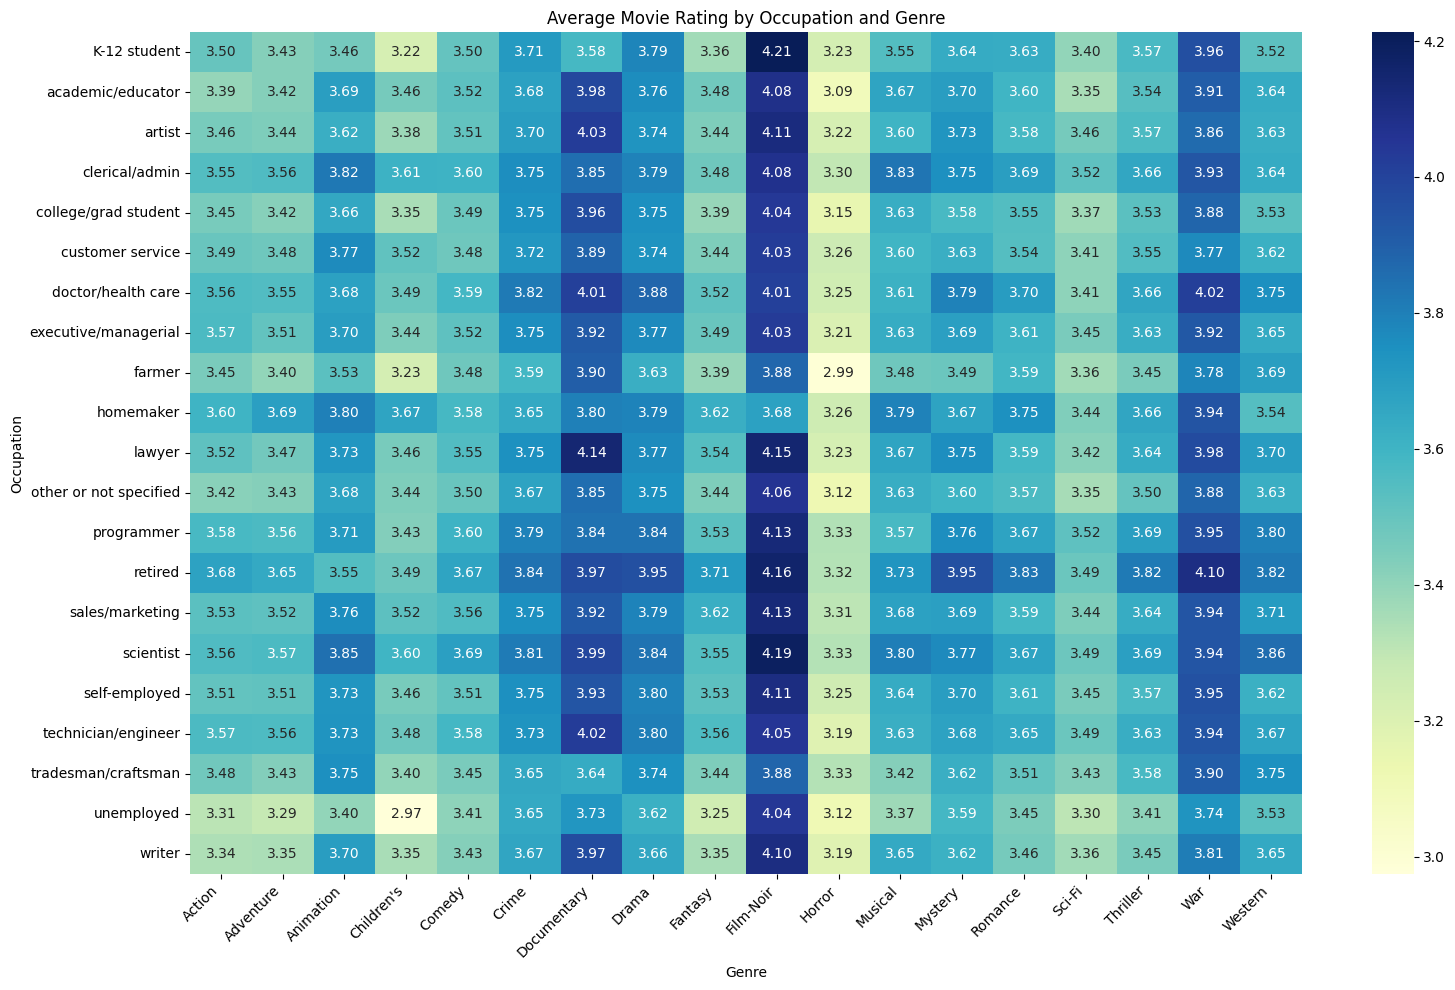

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Melt the DataFrame to have a single 'Genre' column for plotting
genres_melted = merged_df.melt(id_vars=['Occupation', 'Rating'], value_vars=['Genre1', 'Genre2', 'Genre3'], var_name='GenreType', value_name='Genre')

# Filter out rows where Genre is 0 (which represents no genre)
genres_melted = genres_melted[genres_melted['Genre'] != 0]

# Map the numerical genre back to genre names for better readability
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western"
}
genres_melted['GenreName'] = genres_melted['Genre'].map(genre_mapping)

# Map the numerical occupation back to occupation names for better readability
occupation_mapping = {
    0: "other or not specified", 1: "academic/educator", 2: "artist",
    3: "clerical/admin", 4: "college/grad student", 5: "customer service",
    6: "doctor/health care", 7: "executive/managerial", 8: "farmer",
    9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer",
    13: "retired", 14: "sales/marketing", 15: "scientist",
    16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman",
    19: "unemployed", 20: "writer"
}
genres_melted['OccupationName'] = genres_melted['Occupation'].map(occupation_mapping)


# Group by OccupationName and GenreName and calculate the mean rating
occupation_genre_rating_mean = genres_melted.groupby(['OccupationName', 'GenreName'])['Rating'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(occupation_genre_rating_mean, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Movie Rating by Occupation and Genre')
plt.xlabel('Genre')
plt.ylabel('Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### ปีของหนังมีผลต่อการให้คะแนนแต่ละช่วงอายุ(คนอายุมากก็จะให้คะแนนหนังเก่าสูงกว่าหนังใหม่ๆ)


In [43]:
import re

# Function to extract the year from the movie title
def extract_year(title):
    year_match = re.search(r'\((\d{4})\)', title)
    if year_match:
        return int(year_match.group(1))
    return None

# Apply the function to the 'Title' column to extract years
movies_df['Year'] = movies_df['Title'].apply(extract_year)

# Get all unique years
all_years = movies_df['Year'].dropna().unique()

# Sort the years
all_years.sort()

# Print the unique years
print("Years of movies in the dataset:")
print(all_years)

Years of movies in the dataset:
[1919 1920 1921 1922 1923 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000]


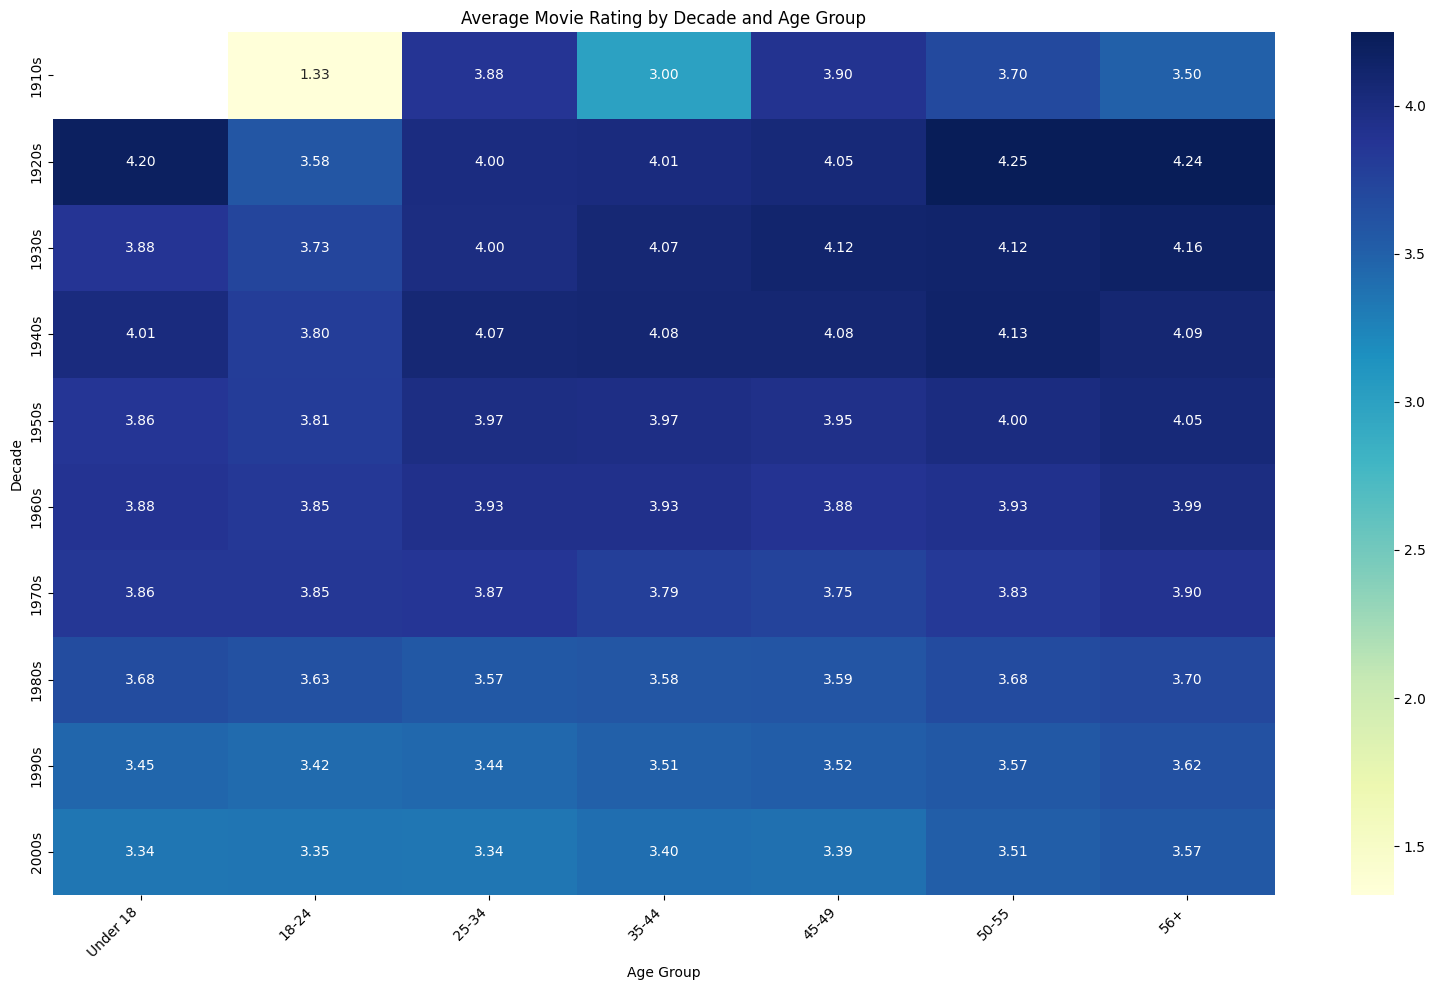

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Merge merged_df with movies_df to get the correct movie release year for each rating
merged_with_year = pd.merge(merged_df, movies_df[['MovieID', 'Year']], on='MovieID', how='left')


# Drop rows where 'Year_y' is NaN (movies without a valid year)
merged_with_year = merged_with_year.dropna(subset=['Year_y'])


# Convert 'Year_y' to integer type
merged_with_year['Year_y'] = merged_with_year['Year_y'].astype(int)


# Create a 'Decade' column
merged_with_year['Decade'] = (merged_with_year['Year_y'] // 10) * 10


# Group by Decade and Age and calculate the mean rating
age_decade_rating_mean = merged_with_year.groupby(['Decade', 'Age'])['Rating'].mean().unstack()


# Map Age back to age group labels for better readability
age_mapping = {
    1: "Under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"
}
age_decade_rating_mean = age_decade_rating_mean.rename(columns=age_mapping)


# Add 's' to the decade labels
age_decade_rating_mean.index = age_decade_rating_mean.index.astype(str) + 's'


# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(age_decade_rating_mean, annot=True, fmt=".2f", cmap="YlGnBu") # You can change "YlGnBu" to other colormaps
plt.title('Average Movie Rating by Decade and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Decade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Target variable analysis

- Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


In [64]:
# Calculate the correlation matrix
# Exclude non-numerical columns
numerical_df = merged_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,UserID,MovieID,Rating,Gender,Age,Occupation,Year,Genre1,Genre2,Genre3,Liked
UserID,1.000000,-0.017739,0.012303,-0.035042,0.034688,-0.026698,-0.031795,0.005981,0.003068,0.001397,0.009157
MovieID,-0.017739,1.000000,-0.064042,0.021626,0.027575,0.008585,-0.014035,0.039828,-0.075916,-0.136118,-0.050906
Rating,0.012303,-0.064042,1.000000,-0.019861,0.056869,0.006753,-0.156946,0.041356,0.020067,-0.001561,0.845576
Gender,-0.035042,0.021626,-0.019861,1.000000,-0.003189,0.114974,-0.002831,-0.045308,-0.000989,0.035590,-0.018007
Age,0.034688,0.027575,0.056869,-0.003189,1.000000,0.078371,-0.165870,0.062423,0.021284,-0.007733,0.043795
Occupation,-0.026698,0.008585,0.006753,0.114974,0.078371,1.000000,-0.010489,-0.009637,0.008258,0.013408,0.006001
Year,-0.031795,-0.014035,-0.156946,-0.002831,-0.165870,-0.010489,1.000000,-0.129037,-0.008150,0.012994,-0.130913
Genre1,0.005981,0.039828,0.041356,-0.045308,0.062423,-0.009637,-0.129037,1.000000,-0.039376,-0.389497,0.039483
Genre2,0.003068,-0.075916,0.020067,-0.000989,0.021284,0.008258,-0.008150,-0.039376,1.000000,0.089175,0.014690
Genre3,0.001397,-0.136118,-0.001561,0.035590,-0.007733,0.013408,0.012994,-0.389497,0.089175,1.000000,-0.005718


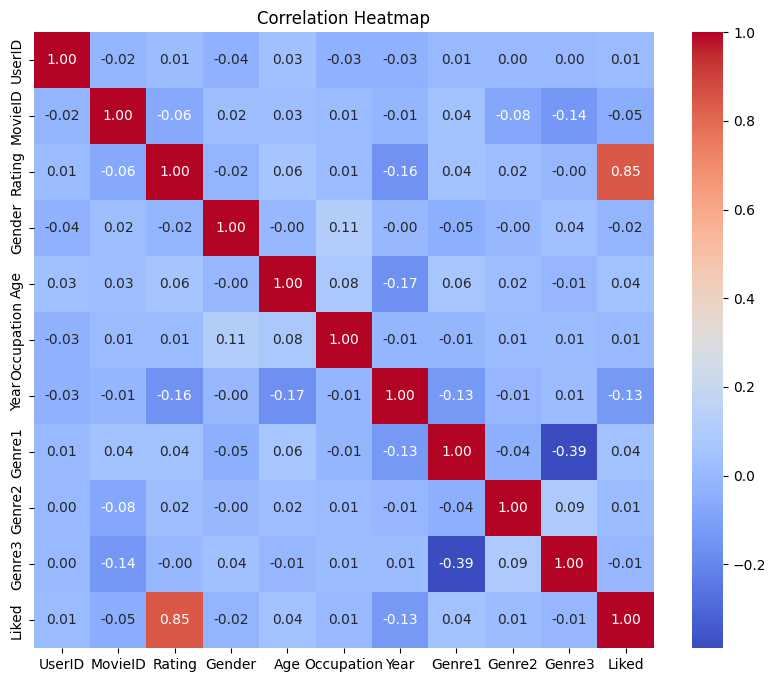

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [88]:
# เลือกเฉพาะ numerical columns
numerical_df = merged_df.select_dtypes(include=['int64', 'float64'])

# คำนวณ correlation กับ target 'Rating'
target_corr = numerical_df.corr()[['Rating']].sort_values(by='Rating', ascending=False)

print("Correlation with Rating:")
display(target_corr)


Correlation with Rating:


,Rating
Rating,1.000000
Liked,0.845576
Age,0.056869
Genre1,0.041356
Genre2,0.020067
UserID,0.012303
Occupation,0.006753
Genre3,-0.001561
Gender,-0.019861
MovieID,-0.064042


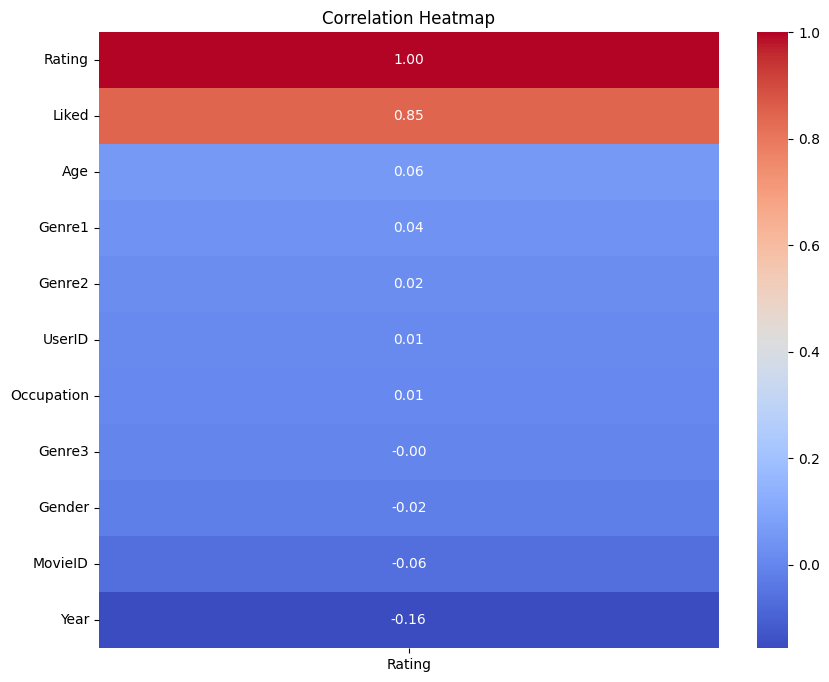

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(target_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Data Modeling

#### Model RandomForest

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [68]:
# Partition data
df = merged_df
# เลือก Features
features = ['Age', 'Gender', 'Occupation', 'Genre1', 'Genre2', 'Genre3']
X = df[features]
y = df['Liked']
# train 80% - test 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and tuning
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate models
y_pred = rf.predict(X_test)
# ตรวจสอบ accuracy
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Train Accuracy: 0.6376131482553017
Test Accuracy: 0.609651973085652

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.36      0.44     84880
           1       0.63      0.79      0.70    115162

    accuracy                           0.61    200042
   macro avg       0.59      0.58      0.57    200042
weighted avg       0.60      0.61      0.59    200042



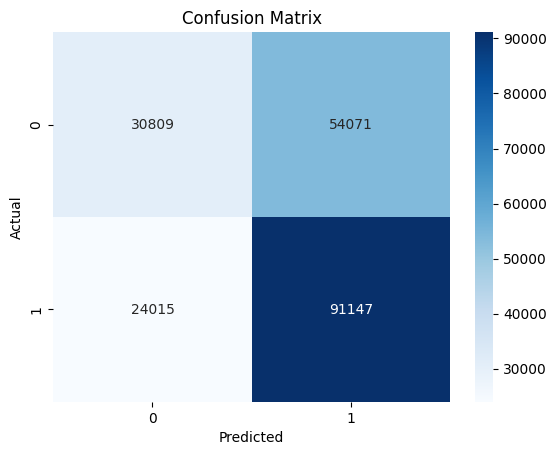

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### ตอบข้อคาดการณ์

###### เพศชายมีแนวโน้มให้คะแนนสูงกว่าในแนว Action / Sci-Fi / Thriller เพศหญิงให้คะแนนสูงกว่าในแนว Romance / Drama / Comedy

In [90]:
male_users = df[df['Gender'] == 0]
female_users = df[df['Gender'] == 1]

In [91]:
action_sci_thriller = ['Action', 'Sci-Fi', 'Thriller']
romance_drama_comedy = ['Romance', 'Drama', 'Comedy']

# สำหรับผู้ชาย
male_genre = male_users[male_users['Genre1'].isin(action_sci_thriller) |
                        male_users['Genre2'].isin(action_sci_thriller) |
                        male_users['Genre3'].isin(action_sci_thriller)]

# สำหรับผู้หญิง
female_genre = female_users[female_users['Genre1'].isin(romance_drama_comedy) |
                            female_users['Genre2'].isin(romance_drama_comedy) |
                            female_users['Genre3'].isin(romance_drama_comedy)]


In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define genre groups ---
action_sci_thriller = ['Action', 'Sci-Fi', 'Thriller']
romance_drama_comedy = ['Romance', 'Drama', 'Comedy']

# แปลงชื่อ Genre เป็นรหัสตัวเลข
action_sci_thriller_codes = [genre_to_number(g) for g in action_sci_thriller]
romance_drama_comedy_codes = [genre_to_number(g) for g in romance_drama_comedy]

# รวมรหัส Genre ทั้งหมดสำหรับการกรอง
all_target_genre_codes = action_sci_thriller_codes + romance_drama_comedy_codes

# กรอง DataFrame ให้เหลือเฉพาะ Genre ที่สนใจ
genre_filtered_df = merged_df[
    merged_df['Genre1'].isin(all_target_genre_codes) |
    merged_df['Genre2'].isin(all_target_genre_codes) |
    merged_df['Genre3'].isin(all_target_genre_codes)
].copy()

# --- สร้าง dictionary เพื่อเก็บผล ---
results = {}

# --- ฟังก์ชันช่วยคำนวณ average probability ---
def calc_avg_prob(df, gender, genre_codes, label):
    filtered = df[(df['Gender'] == gender) &
                  (df['Genre1'].isin(genre_codes) |
                   df['Genre2'].isin(genre_codes) |
                   df['Genre3'].isin(genre_codes))]
    if filtered.empty:
        print(f"No movies found for {label}.")
        return None
    X = filtered[features]
    X.columns = X.columns.astype(str)
    probs = rf.predict_proba(X)[:, 1]
    avg_prob = probs.mean()
    print(f"Average probability {label}: {avg_prob}")
    return avg_prob

# --- คำนวณทั้ง 4 กลุ่ม ---
results['Male (Action/Sci-Fi/Thriller)'] = calc_avg_prob(genre_filtered_df, 1, action_sci_thriller_codes, 'Male (Action/Sci-Fi/Thriller)')
results['Male (Romance/Drama/Comedy)'] = calc_avg_prob(genre_filtered_df, 1, romance_drama_comedy_codes, 'Male (Romance/Drama/Comedy)')
results['Female (Action/Sci-Fi/Thriller)'] = calc_avg_prob(genre_filtered_df, 0, action_sci_thriller_codes, 'Female (Action/Sci-Fi/Thriller)')
results['Female (Romance/Drama/Comedy)'] = calc_avg_prob(genre_filtered_df, 0, romance_drama_comedy_codes, 'Female (Romance/Drama/Comedy)')

Average probability Male (Action/Sci-Fi/Thriller): 0.5515335466597633
Average probability Male (Romance/Drama/Comedy): 0.590722324318802
Average probability Female (Action/Sci-Fi/Thriller): 0.5619003392161191
Average probability Female (Romance/Drama/Comedy): 0.6069330526916463


###### เพศหญิงจะมีพฤติกรรมการดูหนังแนว Comedy drama มากกว่าเพศชาย

In [98]:
comedy_drama_codes = [genre_to_number('Comedy'), genre_to_number('Drama')]

In [99]:
male_comedy_drama = merged_df[
    (merged_df['Gender'] == 1) &
    ((merged_df['Genre1'].isin(comedy_drama_codes)) |
     (merged_df['Genre2'].isin(comedy_drama_codes)) |
     (merged_df['Genre3'].isin(comedy_drama_codes)))
]

female_comedy_drama = merged_df[
    (merged_df['Gender'] == 0) &
    ((merged_df['Genre1'].isin(comedy_drama_codes)) |
     (merged_df['Genre2'].isin(comedy_drama_codes)) |
     (merged_df['Genre3'].isin(comedy_drama_codes)))
]


In [100]:
# สำหรับ male
if not male_comedy_drama.empty:
    X_male = male_comedy_drama[features]
    X_male.columns = X_male.columns.astype(str)
    male_probs = rf.predict_proba(X_male)[:, 1]
    male_avg = male_probs.mean()
else:
    male_avg = None

# สำหรับ female
if not female_comedy_drama.empty:
    X_female = female_comedy_drama[features]
    X_female.columns = X_female.columns.astype(str)
    female_probs = rf.predict_proba(X_female)[:, 1]
    female_avg = female_probs.mean()
else:
    female_avg = None

print("Average probability male (Comedy/Drama):", male_avg)
print("Average probability female (Comedy/Drama):", female_avg)


Average probability male (Comedy/Drama): 0.5919383932044132
Average probability female (Comedy/Drama): 0.6065589145258521


###### กลุ่มอาชีพที่มีพื้นฐานด้านเทคโนโลยีหรือศิลปะ (เช่น Programmer, Artist) มีแนวโน้มให้คะแนนสูงกว่าในหนังที่มี concept ซับซ้อน เช่น Sci-Fi หรือ Mystery

In [103]:
# กำหนดรหัส Occupation สำหรับ Tech/Art
tech_art_jobs = [12, 15, 17, 2, 20]

# Genre ซับซ้อน
complex_genres = ['Sci-Fi', 'Mystery']
complex_genre_codes = [genre_to_number(g) for g in complex_genres]

# กรองข้อมูล
tech_art_df = merged_df[
    (merged_df['Occupation'].isin(tech_art_jobs)) &
    ((merged_df['Genre1'].isin(complex_genre_codes)) |
     (merged_df['Genre2'].isin(complex_genre_codes)) |
     (merged_df['Genre3'].isin(complex_genre_codes)))
]

other_df = merged_df[
    (~merged_df['Occupation'].isin(tech_art_jobs)) &
    ((merged_df['Genre1'].isin(complex_genre_codes)) |
     (merged_df['Genre2'].isin(complex_genre_codes)) |
     (merged_df['Genre3'].isin(complex_genre_codes)))
]

# ใช้โมเดลทำนายความน่าจะเป็น
def get_avg_prob(df):
    if df.empty:
        return None
    X = df[features]
    X.columns = X.columns.astype(str)
    return rf.predict_proba(X)[:, 1].mean()

tech_art_prob = get_avg_prob(tech_art_df)
other_prob = get_avg_prob(other_df)

print("Average probability (Tech/Art Occupations, Sci-Fi/Mystery):", tech_art_prob)
print("Average probability (Other Occupations, Sci-Fi/Mystery):", other_prob)


Average probability (Tech/Art Occupations, Sci-Fi/Mystery): 0.544507308098066
Average probability (Other Occupations, Sci-Fi/Mystery): 0.527860528874887


###### ปีของหนังมีผลต่อการให้คะแนนแต่ละช่วงอายุ(คนอายุมากก็จะให้คะแนนหนังเก่าสูงกว่าหนังใหม่ๆ)

In [104]:
age_groups = merged_df['AgeGroup'].unique()

In [105]:
def avg_prob_by_year_agegroup(df, age_group):
    subset = df[df['AgeGroup'] == age_group]
    if subset.empty:
        return None
    X = subset[features]
    X.columns = X.columns.astype(str)
    subset['pred_prob'] = rf.predict_proba(X)[:, 1]
    # กลุ่มข้อมูลตามปีของหนัง
    avg_by_year = subset.groupby('Year')['pred_prob'].mean()
    return avg_by_year


In [115]:
results_by_age = {}

for ag in age_groups:
    avg_year = avg_prob_by_year_agegroup(merged_df, ag)
    results_by_age[ag] = avg_year

/tmp/ipython-input-2337749854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['pred_prob'] = rf.predict_proba(X)[:, 1]
/tmp/ipython-input-2337749854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['pred_prob'] = rf.predict_proba(X)[:, 1]
/tmp/ipython-input-2337749854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

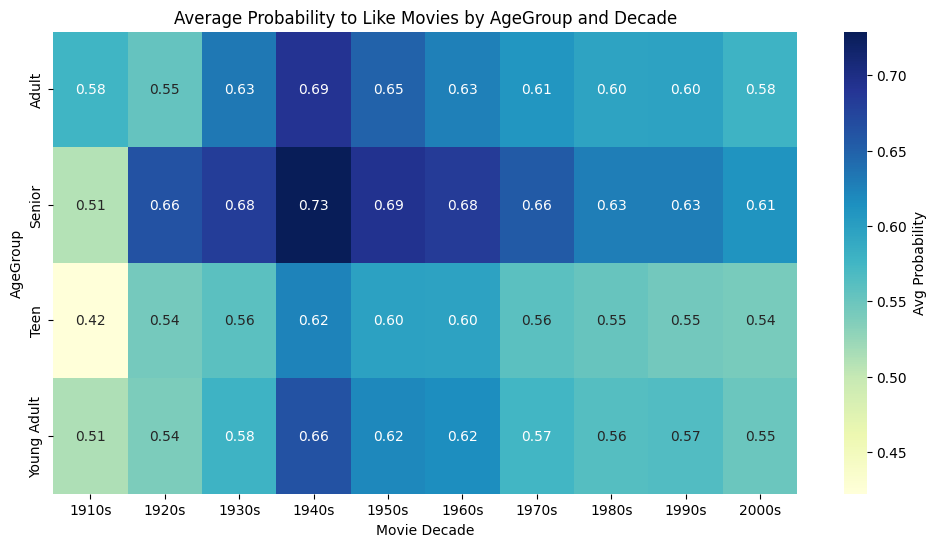

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- แปลง results_by_age เป็น DataFrame ---
heatmap_data = []

for ag, avg_year in results_by_age.items():
    if avg_year is not None:
        for year, prob in avg_year.items():
            heatmap_data.append({'AgeGroup': ag, 'Year': year, 'Probability': prob})

heatmap_df = pd.DataFrame(heatmap_data)

# --- สร้างยุคของหนัง (decade) ---
heatmap_df['Decade'] = (heatmap_df['Year'] // 10) * 10
heatmap_df['Decade'] = heatmap_df['Decade'].astype(str) + 's'

# คำนวณค่าเฉลี่ย probability ต่อ AgeGroup ต่อยุค
heatmap_pivot = heatmap_df.groupby(['AgeGroup', 'Decade'])['Probability'].mean().unstack()

# --- Plot Heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label':'Avg Probability'})
plt.title('Average Probability to Like Movies by AgeGroup and Decade')
plt.ylabel('AgeGroup')
plt.xlabel('Movie Decade')
plt.show()


### ระบบแนะนำหนัง

##### แนะนำหนัง ตาม เพศ กลุ่มอายุ กลุ่มอาชีพ

In [80]:
def recommend_top_n(user_features, df, model, n=5):
    # หนังทั้งหมด
    all_movies = df[['MovieID', 'Title', 'Genre1', 'Genre2', 'Genre3']].drop_duplicates().copy() # Add .copy() to avoid SettingWithCopyWarning

    # สร้าง dataframe สำหรับทำนาย
    temp = all_movies.copy()
    temp['Age'] = user_features['Age']
    temp['Gender'] = user_features['Gender']
    temp['Occupation'] = user_features['Occupation']

    # Select only the features used during training
    features_for_prediction = ['Age', 'Gender', 'Occupation', 'Genre1', 'Genre2', 'Genre3']

    # predict probability ว่าผู้ใช้จะชอบ
    temp['Liked_Prob'] = model.predict_proba(temp[features_for_prediction])[:,1]

    # เลือก Top-N
    top_n = temp.sort_values('Liked_Prob', ascending=False).head(n)
    return top_n[['Title', 'Liked_Prob', 'Genre1', 'Genre2', 'Genre3']] # Include genre columns

In [81]:
# สร้าง dictionary สำหรับเก็บผลลัพธ์
recommendations_by_group = {}

# group ตาม AgeGroup, Gender, Occupation
grouped = df.groupby(['AgeGroup', 'Gender', 'Occupation'])

# Map numerical genre codes back to names
genre_mapping = {
    1: "Action", 2: "Adventure", 3: "Animation", 4: "Children's", 5: "Comedy",
    6: "Crime", 7: "Documentary", 8: "Drama", 9: "Fantasy", 10: "Film-Noir",
    11: "Horror", 12: "Musical", 13: "Mystery", 14: "Romance", 15: "Sci-Fi",
    16: "Thriller", 17: "War", 18: "Western", 0: "Unknown"
}

occupation_mapping = {
    0: "Other/General",
    1: "Education/Academia",
    2: "Arts/Media",
    3: "Business/Management",
    4: "Education/Academia",
    5: "Business/Management",
    6: "Professional Services",
    7: "Business/Management",
    8: "Other/General",
    9: "Other/General",
    10: "Education/Academia",
    11: "Professional Services",
    12: "STEM/Technical",
    13: "Other/General",
    14: "Business/Management",
    15: "STEM/Technical",
    16: "Other/General",
    17: "STEM/Technical",
    18: "Other/General",
    19: "Other/General",
    20: "Arts/Media"
}

for group_keys, group_df in grouped:
    age_group, gender, occupation = group_keys
    group_users = group_df[['Age', 'Gender', 'Occupation']].drop_duplicates()
    group_recs_list = [] # Use a list to store recommended movies with genres

    for _, user_features in group_users.iterrows():
        # Get top 3 recommendations for each user in the group
        recs = recommend_top_n(user_features, df, rf, n=3)

        # Process recommendations to extract title and existing genres
        for index, row in recs.iterrows():
            movie_info = {'Title': row['Title']}
            # Iterate through potential genre columns and add if they exist and are not 0
            genres = []
            for i in range(1, 4):
                genre_col = f'Genre{i}'
                if genre_col in row and row[genre_col] != 0:
                    genres.append(genre_mapping.get(row[genre_col], 'Unknown'))

            movie_info['Genres'] = genres
            group_recs_list.append(movie_info)


    # Count the occurrences of each movie title within the group
    movie_counts = pd.Series([rec['Title'] for rec in group_recs_list]).value_counts()

    # Get the Top 5 movie titles
    top_movie_titles = movie_counts.head(5).index.tolist()

    # Get the genres for the Top 5 movies from the processed list
    top_genres = {}
    for movie_title in top_movie_titles:
        # Find the first occurrence of the movie in the processed list to get its genres
        movie_rec = next((rec for rec in group_recs_list if rec['Title'] == movie_title), None)
        if movie_rec:
            # Join the list of genre names into a string
            top_genres[movie_title] = ', '.join(movie_rec['Genres']) if movie_rec['Genres'] else 'N/A'

    recommendations_by_group[group_keys] = top_genres

# แสดงผล
for group_keys, movies in recommendations_by_group.items():
    age_group, gender, occupation_code = group_keys
    # Map numerical gender and occupation code back to names for display
    gender_name = 'Female' if gender == 0 else 'Male'
    occupation_name = occupation_mapping.get(occupation_code, 'Unknown')


    print(f"Age Group: {age_group}, Gender: {gender_name}, Occupation: {occupation_name}")
    for i, (movie, genre) in enumerate(movies.items(), 1):
        print(f"{i}. {movie} | Genre: {genre}")
    print("\n")

Age Group: Adult, Gender: Female, Occupation: Other/General
1. So Dear to My Heart | Genre: Children's, Drama
2. Secret Garden, The | Genre: Children's, Drama
3. Little Princess, A | Genre: Children's, Drama
4. Perfect Storm, The | Genre: Action, Adventure, Thriller
5. Anatomy of a Murder | Genre: Drama, Mystery


Age Group: Adult, Gender: Female, Occupation: Education/Academia
1. Cimarron | Genre: Western
2. Davy Crockett, King of the Wild Frontier | Genre: Western
3. Great Locomotive Chase, The | Genre: Adventure, War
4. Original Kings of Comedy, The | Genre: Comedy, Documentary
5. Crossfire | Genre: Crime, Film-Noir


Age Group: Adult, Gender: Female, Occupation: Arts/Media
1. My Fair Lady | Genre: Musical, Romance
2. Vampyros Lesbos (Las Vampiras) | Genre: Horror
3. Carrie | Genre: Horror
4. Ghost | Genre: Comedy, Romance, Thriller
5. Before and After | Genre: Drama, Mystery


Age Group: Adult, Gender: Female, Occupation: Business/Management
1. My Fair Lady | Genre: Musical, Romanc

##### คาดการณ์ประเภทและภาพยนตร์ยอดนิยมในทุกกลุ่มประชากร

In [83]:
def predict_liked_for_group(df_movies, group_features, model):
    df_pred = df_movies.copy()

    # ใส่ข้อมูลกลุ่มลงใน df
    for k, v in group_features.items():
        df_pred[k] = v

    # One-hot encode เหมือน training
    categorical_cols = ['Gender','Occupation','AgeGroup']
    df_pred_encoded = pd.get_dummies(df_pred, columns=categorical_cols, drop_first=True)

    # เติม column ที่ขาดให้ตรงกับ model
    for col in model.feature_names_in_:
        if col not in df_pred_encoded.columns:
            df_pred_encoded[col] = 0
    df_pred_encoded = df_pred_encoded[model.feature_names_in_]

    # ทำนาย
    df_pred['Pred_Liked'] = model.predict(df_pred_encoded)
    return df_pred[df_pred['Pred_Liked']==1]  # เลือกเฉพาะที่ทำนายว่า liked=1

In [84]:
age_groups = ['Teen', 'Young Adult', 'Adult', 'Senior']
occupations = list(range(19))  # 0–18

groups = []

for age in age_groups:
    for occ in occupations:
        groups.append({
            'AgeGroup': age,
            'Gender': 0,  # Female เริ่มต้น, สามารถเปลี่ยนเป็น 1 หรือ loop เพิ่มได้
            'Occupation': occ
        })

all_recommended_movies = []

for group in groups:
    recs = predict_liked_for_group(df, group, rf)
    for _, row in recs.iterrows():
        # map genre code เป็นชื่อ
        genres = []
        for i in range(1, 4):
            genre_col = f'Genre{i}'
            if genre_col in row and row[genre_col] != 0:
                genres.append(genre_mapping.get(row[genre_col], 'Unknown'))
        all_recommended_movies.append({'Title': row['Title'], 'Genres': genres})


In [85]:
# Top 3 หนัง
all_movie_counts = pd.Series([rec['Title'] for rec in all_recommended_movies]).value_counts()
top_3_popular_movies = all_movie_counts.head(3).index.tolist()

print("Top 3 Recommended Movies Across All Demographics:")
for i, movie_title in enumerate(top_3_popular_movies, 1):
    movie_rec = next((rec for rec in all_recommended_movies if rec['Title'] == movie_title), None)
    genres = ', '.join(movie_rec['Genres']) if movie_rec and movie_rec['Genres'] else 'N/A'
    print(f"{i}. {movie_title} | Genre: {genres}")

# Top 5 Genre
all_recommended_genres = []
for rec in all_recommended_movies:
    all_recommended_genres.extend(rec['Genres'])
genre_counts_across_groups = pd.Series(all_recommended_genres).value_counts()
top_5_popular_genres = genre_counts_across_groups.head(5).index.tolist()

print("\nTop 5 Recommended Genres Across All Demographics:")
for i, genre in enumerate(top_5_popular_genres, 1):
    print(f"{i}. {genre}")


Top 3 Recommended Movies Across All Demographics:
1. American Beauty | Genre: Comedy, Drama
2. Star Wars: Episode V - The Empire Strikes Back | Genre: Action, Adventure, Drama
3. Back to the Future | Genre: Comedy, Sci-Fi

Top 5 Recommended Genres Across All Demographics:
1. Drama
2. Comedy
3. Action
4. Romance
5. Thriller


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------

* * *
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
  * Data Description: อธิบายข้อมูลที่ใช้
  * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
  * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
  * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
    * Conjectures >= 3 ข้อ
    * Machine learning models
  * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
* * *

---

## **Data**

---

### **รายละเอียดข้อมูล MovieLens 1M**

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)